# Práctica 2 - MLP para funciones lógicas - Lab 2
## Preparación de entorno
#### Instalar las librerías

In [58]:
#%pip install
#%pip install numpy
#%pip install matplotlib
#%pip install pandas

#### Importar librerías de código

In [59]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## MLP SetUp

* **Perceptrón Multicapa** $\rightarrow$ Red neuronal artificial feedfoward (la información fluye en una dirección, desde la capa de entrada hasta la de salida, sin bucles).
  * Al menos **3 capas**: entrada, oculta y salida.
  * Cada neurona en las capas ocultas y de salida recibe **entradas** de todas las neuronas de la capa anterior, calcula una **suma ponderada** más un sesgo (bias) y aplica una **función de activación** no lineal.

* **Capas del MLP**:
  * **Capa de entrada** $\rightarrow$ REpresenta las características de los datos de entrada, con un número de neuronas igual a la dimensión de los datos de entrada.
  * **Capas ocultas** $\rightarrow$ Procesan las entradas mediante sumas ponderadas y funciones de activación, como la $\text{ReLU}$, la $\text{sigmoide}$ o la $\text{tangente hiperbólica}$.
  * **Capa de salida** $\rightarrow$ Produce las predicciones finales, cno el número de neuronas dependiendo del problema a resolver (regresión, clasificación binaria o multiclase).

* **Entrenamiento del MLP**:
  * **Backpropagation** $\rightarrow$ Método supervisado que ajusta los pesos para minizar la función de pérdida. También se pueden usar otros métodos como Adam, que procesa los datos n mini-lotes hasta converger o alcanzar un número fijo de épocas.

* **Capacidad matemática** $\rightarrow$ Los MLP pueden aproximar cualquier función continua, según el teorema de aproximación universal, dado un número suficiente de neuronas en y capas.

Diferencia entre **Perceptrón** y **Perceptrón Multicapa**:

| Aspecto            | Perceptrón                                           | Perceptrón Multicapa                                                            |
| ------------------ | ---------------------------------------------------- | ------------------------------------------------------------------------------- |
| **Capas**          | Una sola capa (entrada y salida).                    | Al menos 3 capas (entrada, oculta y salida).                                    |
 | **Problema tipo** | Linealmente separable (clasificación binaria).       | No linealmente separable, clasificación y regresión complejas.                  |
 | **Entrenamiento** | Regla de aprendizaje simple.                         | Backpropagation y otros métodos más complejos (requiere funciones no lineales). |
 | **Limitaciones**  | No resuelve el XOR (esta limitado a datos lineales). | Puede sobreajustar si no se controla la complejidad del modelo.                 |

* **Proceso de aprendizaje**:
  1. **Inicialización** $\rightarrow$ Primero, inicializamos los pesos $W$ y el sesgo (bias) $b$ de la red de forma aleatoria (normalmente se usan distribuciones como la normal o la uniforme.). Además, preparamos los valores iniciales para Adam como los vectores de momentos $m_0 = 0$ (primer momento, relacionado con la media de los gradientes) y $v_0 = 0$ (segundo momento, relacionado con la varianza de los gradientes). Los hiperparámetros de Adam incluyen:
     1. $\alpha$ $\rightarrow$ Learning rate.
     2. $\beta_1$ $\rightarrow$ Factor de decaimiento para el primer momento.
     3. $\beta_2$ $\rightarrow$ Factor de decaimiento para el segundo momento.
     4. $\epsilon$ $\rightarrow$ Constante para evitar divisiones entre cero.
  
  2. **Presentación del patrón** $\rightarrow$ Seleccionamos un patrón de entrenamiento (una entrada $x$ y su salida deseada $y$). 
  
  3. **Cálculo de la salida** $\rightarrow$ Propagamos hacia adelante la entrada $x$ a través de la red. Para una red con una capa oculta, el proceso es:
     1. **Capa oculta** $\rightarrow$ $h = ReLU (W_1 \cdot x + b_1)$, donde $ReLU$ es la función de activación $f(x) = max(0, x)$. $ReLU$ nos ayuda a mitigar el problema del desvanecimiento del gradiente.
     2. **Capa de salida** $\rightarrow$ $y_{pred} = sigmoide (W_2 \cdot h + b_2)$, donde $sigmoide$ es la función de activación $f(x) = \frac{1}{1 + e^{-x}}$. Esta función es útil para producir salidas en el rango $[0, 1]$.
  
  4. **Cálculo del Error** $\rightarrow$ Usamos la función de pérdida *Mean Squared Error* (MSE) para calcular el error entre la salida que hemos predicho y la salida que esperábamos. La función MSE es:
     $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{pred} - y_{esperada})^2$$

  5. **Variación de los pesos** $\rightarrow$ Con Adam, calculamos los gradientes de la pérdida con respecto a cada parámetro usando backpropagation. Adam actualiza los pesos adaptando el learning rate para cada parámetro basado en los momentos. Los pasos son:
     1. Calculamos el gradiente $g_t$ en el paso $t$.
     2. Actualizamos el primer momento: $m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$.
     3. Actualizamos el segundo momento: $v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2$.
     4. Corregismos el bias: $\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$ y $\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$.
     5. Actualizamos los parámetros $W$ y $b$: $W_t = W_{t-1} - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$.
  
  6. **Modificación de los pesos$** $\rightarrow$ Aplicamos las actualizaciones que hemos calculado, ajustando $W$ y $b$ según la fórmula de Adam.
  
  7. **Repetir** $\rightarrow$ Repetimos los pasos 2 a 6 para cada patrón de entrenamiento, hasta que la red haya visto todos los patrones del conjunto de entrenamiento.
  
  8. **Verificar la convergencia** $\rightarrow$ Comprobamos si el error (MSE) ha alcanzado un valor aceptable o si el número de épocas ha llegado a un límite. Si no, volvemos al paso 2.

Referencias (código):
* [MultilayerNN.](https://github.com/KDA-lab/NN-Chainer/blob/edac5d4c6d664404117bcaad253f8e003af278e5/multilayerNN.py)


=== Modelo con 2 neuronas en la capa oculta ===

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target | Predicho  |
------------------------------------
| 0.0  | 0.0  | 0.0    | 0.500528  |
| 0.0  | 1.0  | 1.0    | 0.499872  |
| 1.0  | 0.0  | 1.0    | 0.500238  |
| 1.0  | 1.0  | 0.0    | 0.499583  |
------------------------------------

=== Modelo con 2 neuronas en la capa oculta ===

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target | Predicho  |
------------------------------------
| 0.0  | 0.0  | 0.0    | 0.500288  |
| 0.0  | 1.0  | 1.0    | 0.991973  |
| 1.0  | 0.0  | 1.0    | 0.500288  |
| 1.0  | 1.0  | 0.0    | 0.008500  |
------------------------------------

=== Modelo con 2 neuronas en la capa oculta ===

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target | Predicho  |
------------------------------------
| 0.0  | 0.0  | 0.0    | 0.499331  |

,Neuronas capa oculta,Época,Salida,Error
0,16,0,[[0.4684106 ]\n [0.5180723 ]\n [0.44540662]\n ...,0.245333
1,16,1,[[0.82193244]\n [0.98273623]\n [0.9253788 ]\n ...,0.416840
2,16,2,[[0.10362585]\n [0.50856566]\n [0.13375488]\n ...,0.282428
3,16,3,[[0.18965426]\n [0.8905138 ]\n [0.5470632 ]\n ...,0.232423
4,16,4,[[0.1903976 ]\n [0.72741973]\n [0.5843665 ]\n ...,0.149232
...,...,...,...,...
95,16,95,[[7.0014008e-04]\n [9.9885726e-01]\n [9.999982...,0.000000
96,16,96,[[7.0015539e-04]\n [9.9886072e-01]\n [9.999982...,0.000000
97,16,97,[[7.00185425e-04]\n [9.98864293e-01]\n [9.9999...,0.000000
98,16,98,[[7.00227509e-04]\n [9.98867750e-01]\n [9.9999...,0.000000



=== Evolución del error durante el entrenamiento ===


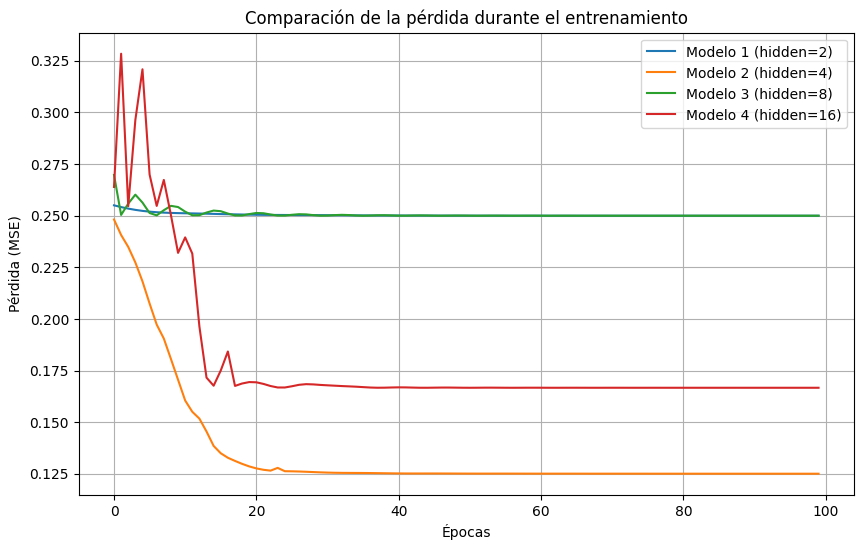


=== Frontera de decisión del mejor modelo ===


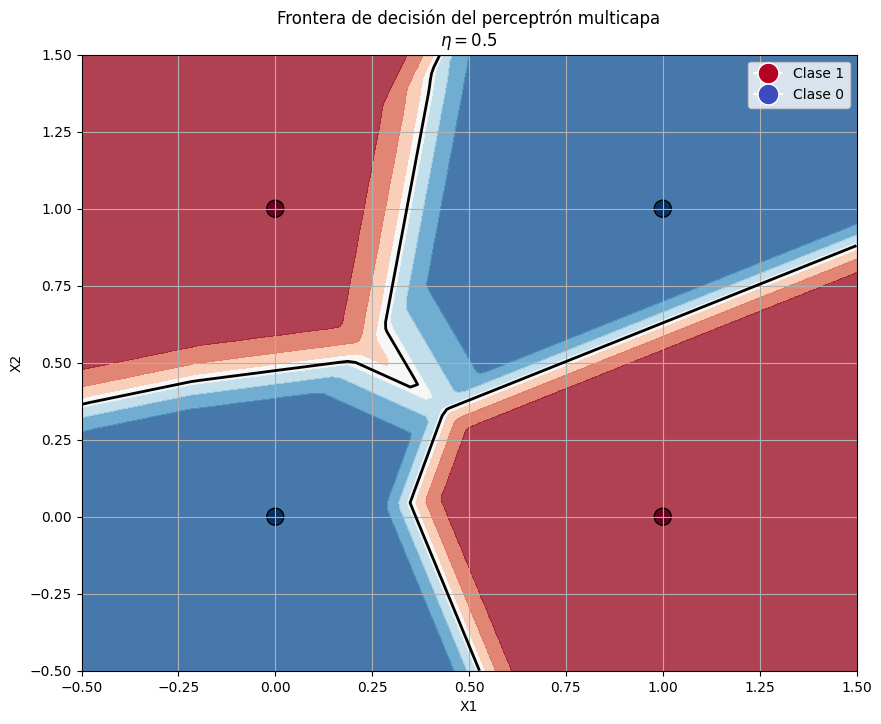

In [ ]:
class PerceptronMLP(nn.Module):
    def __init__(self, tamano_entrada, tamano_oculta, tamano_salida, learning_rate=0.1, max_iteraciones=100, activacion='relu'):
        super(PerceptronMLP, self).__init__()
        self.capa_oculta = nn.Linear(tamano_entrada, tamano_oculta)
        self.capa_salida = nn.Linear(tamano_oculta, tamano_salida)
        self.sigmoide = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.mse = nn.MSELoss()

        # Seleccionamos la función de activación para la capa oculta
        self.activacion = activacion
        if activacion == 'relu':
            self.func_activacion = nn.ReLU()
        elif activacion == 'sigmoid':
            self.func_activacion = nn.Sigmoid()
        else:
            raise ValueError("Función de activación no soportada. Use 'relu' o 'sigmoid'")

        self.learning_rate = learning_rate
        self.max_iteraciones = max_iteraciones
        self.errores = []
        self.detalles_entrenamiento = []

    def forward(self, entrada) -> torch.Tensor:
        """Función que hace el Feed Forward de la red neuronal. Primero pasa las
        características por la capa oculta, luego aplica la función de activación
        ReLU y finalmente pasa por la capa de salida y la función de activación sigmoide.

        Args:
            entrada: Características de entrada para la red

        Returns:
            torch.Tensor: Salida de la red neuronal
        """

        entrada = self.capa_oculta(entrada)
        entrada = self.func_activacion(entrada)
        entrada = self.capa_salida(entrada)
        entrada = self.sigmoide(entrada)
        return entrada

    def entrenar(self, X, y) -> None:
        """Entrenar el perceptrón multicapa con un conjunto de
        datos de entrada X y sus respectivas salidas esperadas y.

        Args:
            X: Entradas de entrenamiento
            y: Salidas esperadas de entrenamiento
        """

        # Si no es un tensor, lo convertimos a tensor
        if not isinstance(X, torch.Tensor):
            X = torch.tensor(X, dtype=torch.float32)

        if not isinstance(y, torch.Tensor):
            y = torch.tensor(y, dtype=torch.float32)

        # Inicializamos el optimizador (Adam)
        optimizador = optim.Adam(self.parameters(), lr=self.learning_rate)

        # Inicializamos la lista de errores y detalles de entrenamiento
        self.errores = []
        self.detalles_entrenamiento = []

        for iteracion in range(self.max_iteraciones):

            # 1. Fast Forward
            y_prediccion = self.forward(X)
            error = self.mse(y_prediccion, y)
            self.errores.append(error.item())

            # 2. Backpropagation
            # Limpiamos los gradientes para no acumularlos
            optimizador.zero_grad()

            # Calculamos los gradientes
            error.backward()

            # Actualizamos los pesos
            optimizador.step()

            # 3. Guardamos los detalles de la iteración
            self.detalles_entrenamiento.append({
                'neuronas_ocultas': self.capa_oculta.weight.detach().numpy().copy(),
                'época': iteracion,
                'salida': y_prediccion.detach().numpy().copy(),
                'error': error.item()
            })


    def mostrar_errores(self, lista_errores, etiquetas, titulo="Comparación de la pérdida durante el entrenamiento") -> None:
        """Muestra una gráfica con la evolución de los errores durante el entrenamiento.
        """
        plt.figure(figsize=(10, 6))
        for losses, label in zip(lista_errores, etiquetas):
            plt.plot(losses, label=label)

        plt.xlabel('Épocas')
        plt.ylabel('Pérdida (MSE)')
        plt.title(titulo)
        plt.legend()
        plt.grid(True)
        plt.show()


    def probar_y_mostrar(self, X, y) -> None:
        """Probar el perceptrón con un conjunto de datos de entrada X y
        sus respectivas salidas esperadas y y mostrar los resultados.

        Args:
            X: Entradas de prueba
            y: Salidas esperadas de prueba
        """

        print("\nResultados del perceptrón multicapa:")
        print("------------------------------------")
        print("|  X1  |  X2  | Target | Predicho  |")
        print("------------------------------------")

        if not isinstance(X, torch.Tensor):
            X = torch.tensor(X, dtype=torch.float32)

        with torch.no_grad():
            for i in range(len(X)):
                entrada = X[i:i+1]
                prediccion = self(entrada).item()

                if isinstance(y, np.ndarray) and y[i].size == 1:
                    target = y[i].item()
                elif isinstance(y, list):
                    target = y[i]
                elif isinstance(y, torch.Tensor):
                    target = y[i].item() if y[i].numel() == 1 else y[i][0].item()
                else:
                    target = y[i]

                print(f"| {X[i][0].item():.1f}  | {X[i][1].item():.1f}  | {target:.1f}    | {prediccion:.6f}  |")

        print("------------------------------------")

    def mostrar_frontera_decision(self, X, y):
        """Muestra la frontera de decisión del perceptrón en un gráfico

        Args:
            X: Datos de entrada
            y: Salidas esperadas
        """

        # Creamos una malla para ver la frontera de decisión
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                            np.linspace(y_min, y_max, 100))

        # Convertimos a tensor de PyTorch
        grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

        # Calculamos la predicción para cada punto de la malla
        with torch.no_grad():
            Z = self(grid)
            Z = Z.reshape(xx.shape).numpy()

        # Pintamos la frontera de decisión
        plt.figure(figsize=(10, 8))
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu_r)
        plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=2)

        # Pintamos los puntos del entrenamiento
        plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.RdBu_r, edgecolors='k', s=150)

        # Crear elementos de leyenda
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', markerfacecolor='#B40426', markersize=15, label='Clase 1'),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='#3B4CC0', markersize=15, label='Clase 0')
        ]

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title(f'Frontera de decisión del perceptrón multicapa\n$\\eta = {self.learning_rate}$')
        plt.legend(handles=legend_elements, loc='best')
        plt.grid(True)
        plt.show()


    def generar_tabla_entrenamiento(self) -> pd.DataFrame:
        """Genera una tabla detallada del proceso de entrenamiento con una
        estructura única de columnas.

        Returns:
            pd.DataFrame: Tabla de entrenamiento
        """
        if not self.detalles_entrenamiento:
            return "No hay detalles de entrenamiento disponibles."

        # Creamos el DataFrame con los detalles de entrenamiento
        datos = []
        for detalle in self.detalles_entrenamiento:
            # Para cada registro de entrenamiento
            epoca = detalle['época']
            error = detalle['error']
            num_neuronas = detalle['neuronas_ocultas']

            # Formatear la salida para mostrarla de manera legible
            # Si la salida es muy grande, mostramos solo los primeros elementos
            salida = detalle['salida']
            if salida.size > 4:
                salida_str = str(salida[:2]) + "..." + str(salida[-2:])
            else:
                salida_str = str(salida)

            # Agregar fila a la tabla
            datos.append({
                "Neuronas capa oculta": num_neuronas,
                "Época": epoca,
                "Salida": salida_str,
                "Error": f"{error:.6f}"
            })

        # Creamos el DataFrame con los datos
        df = pd.DataFrame(datos)

        return df


def evaluar_diferentes_parametros(X, y):
    """Evaluar diferentes parámetros para el perceptrón y mostrar los resultados.

    Args:
        X: Datos de entrada
        y: Salidas esperadas
    Returns:
        list: Lista con los resultados de la evaluación
    """

    tamano_capa_entrada = 2
    tamano_capa_salida = 1

    # Rangos de valores para la capa oculta, epocas y learning_rates
    tamanos_capa_oculta = [2, 4, 8, 16]
    learning_rates = [0.01, 0.1, 0.5, 0.9]

    resultados = []
    errores = []
    mejor_iteracion = float('inf')
    mejor_error = float('inf')
    mejor_tamano_capa_oculta = None
    mejor_learning_rate = None

    for tamano_capa_oculta in tamanos_capa_oculta:
        for learning_rate in learning_rates:
            print(f"\n=== Modelo con {tamano_capa_oculta} neuronas en la capa oculta ===")

            mlp = PerceptronMLP(tamano_capa_entrada, tamano_capa_oculta, tamano_capa_salida, learning_rate=learning_rate)
            mlp.entrenar(X, y)

            # Evaluamos los resultados
            error_final = mlp.errores[-1]
            umbral_convergencia = 0.01
            convergencia_alcanzada = error_final < umbral_convergencia

            # Generamos tabla de entrenamiento
            tabla_entrenamiento = mlp.generar_tabla_entrenamiento()

            # Probamos el perceptrón
            mlp.probar_y_mostrar(X, y)

            resultados.append({
                'neuronas_capa_oculta': tamano_capa_oculta,
                'convergencia': convergencia_alcanzada,
                'error_final': error_final,
                'learning_rate': learning_rate,
                'tabla_entrenamiento': tabla_entrenamiento
            })

            errores.append(mlp.errores)

            if error_final < mejor_error:
                mejor_error = error_final
                mejor_learning_rate = learning_rate
                mejor_tamano_capa_oculta = tamano_capa_oculta
                mejor_iteracion = len(mlp.errores)


    print("\n=== Mejores parámetros encontrados ===")
    print(f"Learning Rate: {mejor_learning_rate}, neuronas capa oculta: {mejor_tamano_capa_oculta}")
    print(f"Convergió en {mejor_iteracion} iteraciones")

    mejor_perceptron = None

    if mejor_learning_rate is not None:
        mejor_perceptron = PerceptronMLP(tamano_capa_entrada, mejor_tamano_capa_oculta, tamano_capa_salida, learning_rate=mejor_learning_rate)
        mejor_perceptron.entrenar(X, y)


    # Si no encontramos un modelo que converja
    if mejor_perceptron is None:
        print("Ninguna configuración convergió completamente.")
        return resultados

    # Mostramos el mejor modelo y su tabla detallada
    print("\n=== Tabla detallada del mejor modelo ===")
    best_table = mejor_perceptron.generar_tabla_entrenamiento()
    display(best_table)

    # Mostramos la gráfica con la evolución del error
    print("\n=== Evolución del error durante el entrenamiento ===")
    mejor_perceptron.mostrar_errores(errores,  [f'Modelo {i+1} (hidden={tamano_capa_oculta})' for i, tamano_capa_oculta in enumerate(tamanos_capa_oculta)])

    # Mostramos la frontera de decisión de nuestro mejor modelo
    print("\n=== Frontera de decisión del mejor modelo ===")
    mejor_perceptron.mostrar_frontera_decision(X, y)

    return resultados

# Datos de entrenamiento para la función XOR
X_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_XOR = np.array([[0], [1], [1], [0]])

resultados_XOR = evaluar_diferentes_parametros(X_XOR, y_XOR)

## MLP Evaluación final